In [31]:
import librosa
import librosa.display

import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import os, re
from dotenv import load_dotenv
import webbrowser

# load the environment variables
load_dotenv()
PROJECT_PATH = os.getenv('PROJECT_PATH')

# set the path to music files
ROOT_PATH = f"{PROJECT_PATH}/genre-clustering/"
MUSIC_PATH = ROOT_PATH + "previews/"
SPECTOGRAM_PATH = ROOT_PATH + "spectograms/"

In [32]:
filenames = os.listdir(SPECTOGRAM_PATH)

In [33]:
# convert previews into spectograms
filenames = os.listdir(MUSIC_PATH)
mel_filter = True

for filename in filenames:
    y, sr = librosa.load(MUSIC_PATH + filename)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    if mel_filter:
        D = librosa.feature.melspectrogram(S=D, sr=sr)
    np.save(SPECTOGRAM_PATH + filename + ".npy", D)

# prepare data
filenames = os.listdir(SPECTOGRAM_PATH)

data = [np.flip(np.load(SPECTOGRAM_PATH + filename)).flatten() for filename in filenames]
len(data)

666

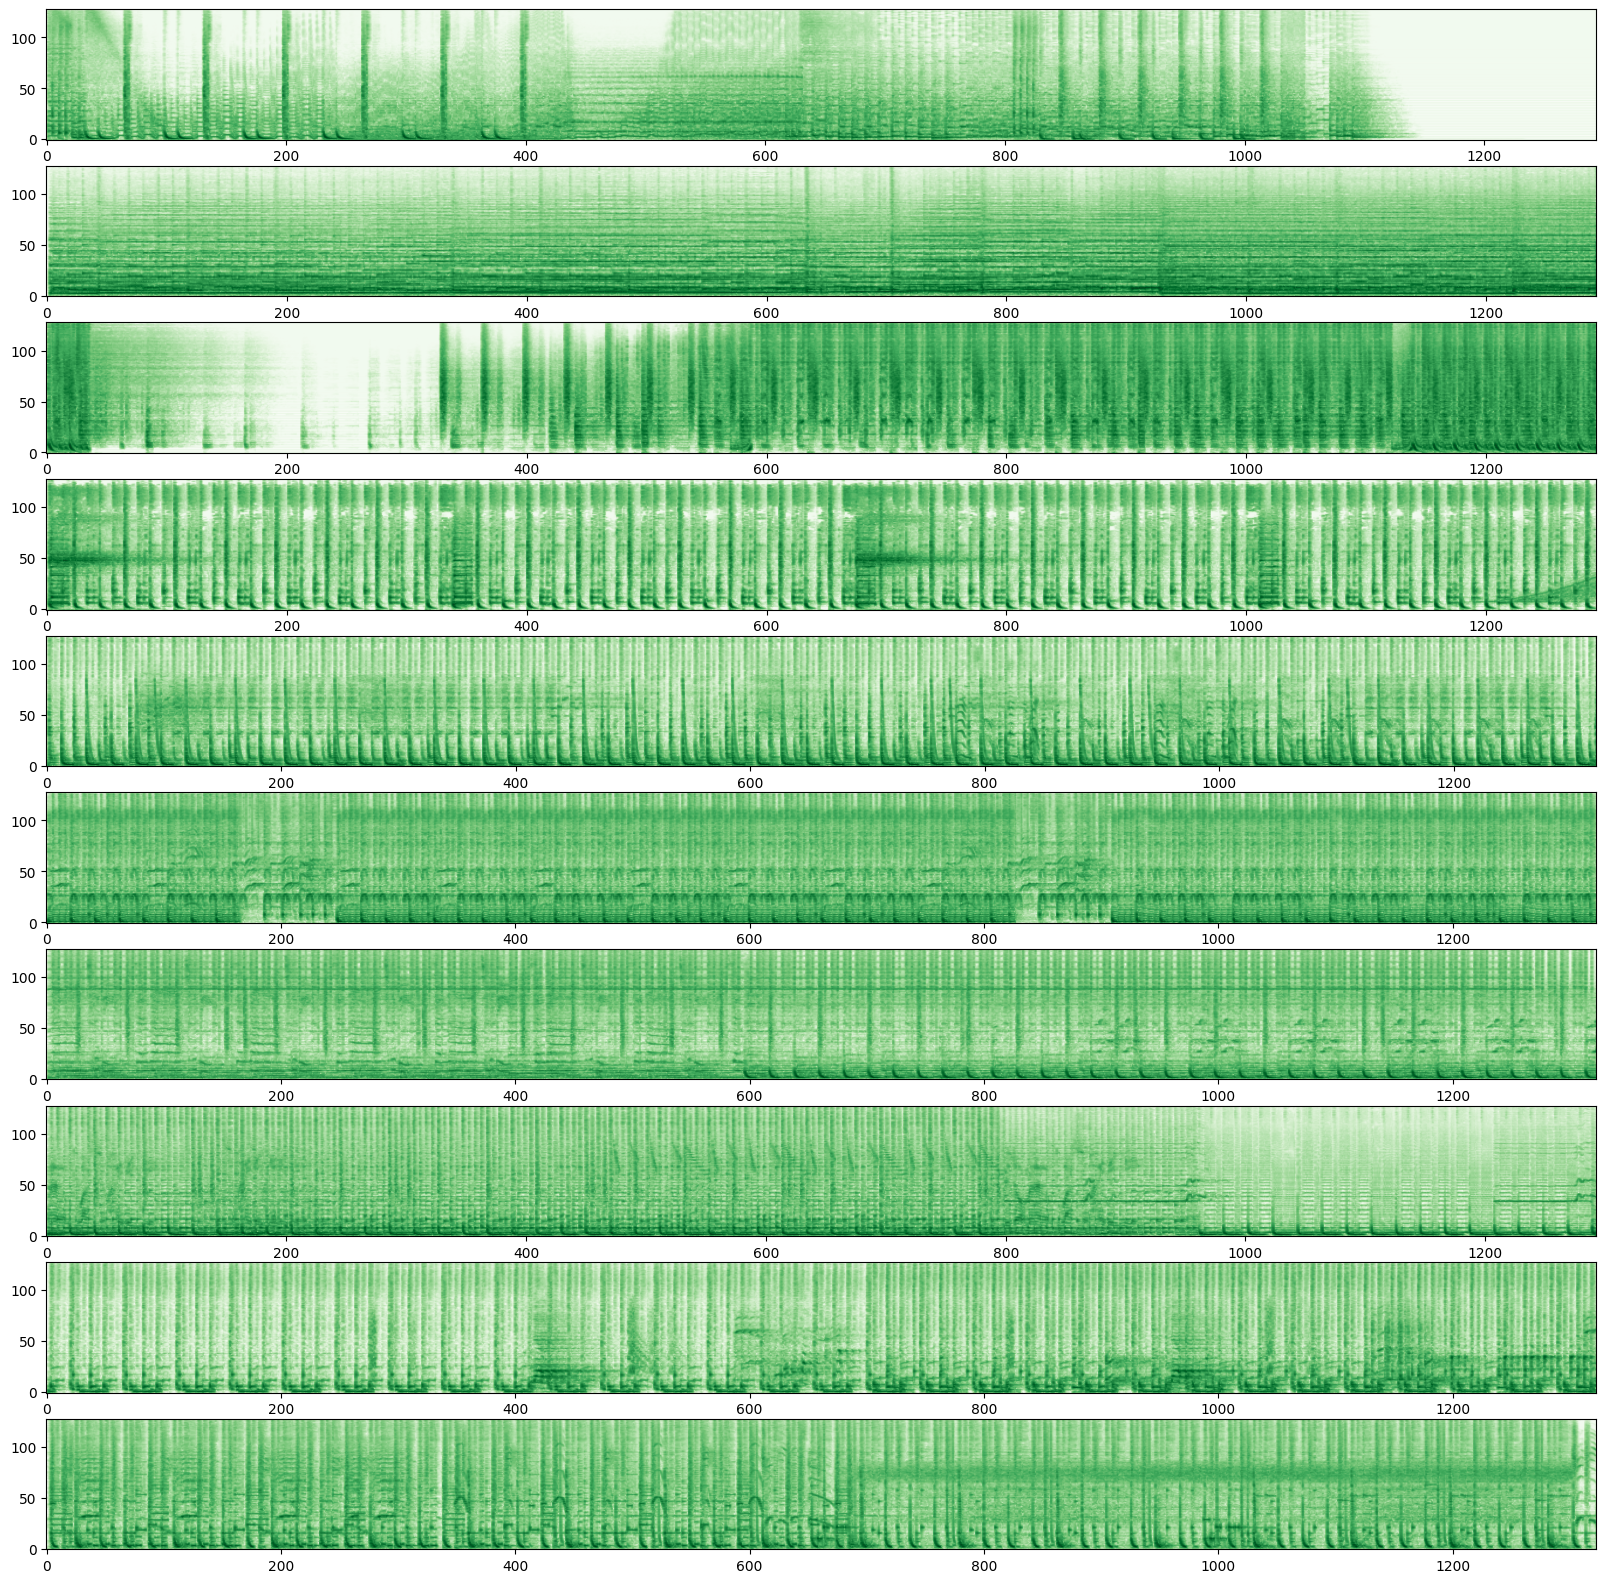

In [4]:
# plot spectograms
filenames = os.listdir(SPECTOGRAM_PATH) 
start, end = 510,520 
fig, ax = plt.subplots(len(filenames[start:end]), figsize=(20,20))
    
for idx, filename in enumerate(filenames[start:end]):
    D = np.load(SPECTOGRAM_PATH + filename)
    ax[idx].imshow(D, cmap='Greens', origin='lower', aspect='auto')

In [5]:
lengths = []
for spec in data:
    lengths.append(len(spec))
set(lengths)

{11136, 160128, 163328, 165376, 165504, 165632, 169216, 169344}

In [6]:
# bring all data on same size
data = np.array([data[i][0:np.min(lengths)] for i in range(len(data))], dtype=np.float64)

In [9]:
# load already reduced data from cnn-spectogram-reduction
data = np.load(f'{ROOT_PATH}data/reduced_data.npy')
data.shape

(400, 1000)

In [11]:
from sklearn.manifold import MDS

# fit MDS model data
mds = MDS(n_components=3, normalized_stress='auto')
data_reduced = mds.fit_transform(data)

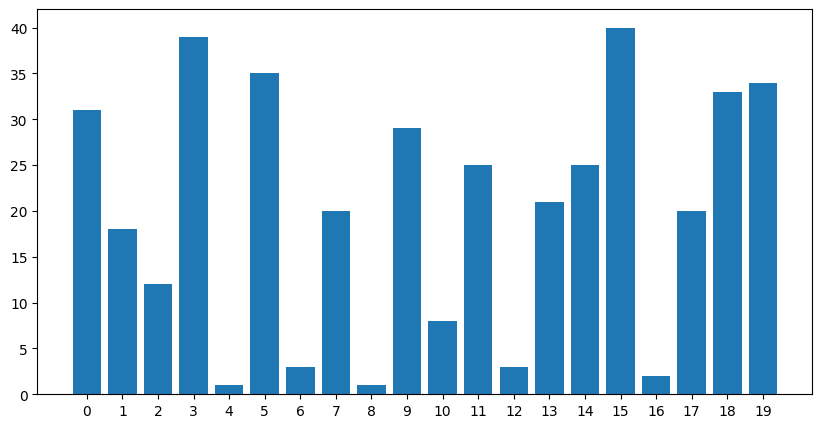

In [13]:
from sklearn.cluster import KMeans

# cluster the data
expected_cluster = 20
kmeans = KMeans(n_clusters=expected_cluster)
clusters = kmeans.fit_predict(data)

def custom_hist(arr):
    labels, counts = np.unique(arr, return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.show()

plt.figure(figsize=(10,5))
custom_hist(clusters)

In [14]:
# select cluster to disply in plot
idx_cluster = 3
cluster_idices = np.array([i for i in range(len(clusters))])[clusters == np.full((len(clusters)), idx_cluster)]

In [ ]:
# plot the reduced data, color the cluster 
PLOT = go.FigureWidget()
scatter = PLOT.add_trace(go.Scatter3d(x = data_reduced[:,0],
                            y = data_reduced[:,1],
                            z = data_reduced[:,2],    
                            text = [f"genre:{clusters[i]} {i}" for i in range(len(clusters))],
                            mode = 'markers',
                            hoverinfo="text",
                            marker=dict(
                                size=3,
                                color=clusters,
                                opacity=0.9,
                                line=dict(width=1)
                            ),
                           )
              )

def print_hello(trace, points, selector):
    match = re.search(r".{13}_(\d+).mp3.npy", filenames[points.point_inds[0]])
    if not match:
        print("Error opening URL")
    webbrowser.open_new_tab(f"https://www.deezer.com/de/track/{match.groups(1)[0]}")

scatter.data[0].on_click(print_hello);

# Add dropdown
PLOT.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                dict(
                    args=["marker", dict(size=6, color=clusters, opacity= 0.9, line=dict(width=1))],
                    label="All Clusters",
                    method="restyle"
                ),
                dict(
                    args=["marker", dict(size=6, color=[1 if i in cluster_idices else 0 for i in range(len(clusters))], opacity= 0.9, line=dict(width=1))],
                    label="Single Cluster",
                    method="restyle"
                ),
            ]),
        ),
    ]
)

PLOT.update_layout(
    margin=dict(l=30, r=30, t=30, b=40),
    paper_bgcolor="LightSteelBlue",
    height=500
)

In [59]:
def url_from_index(n, filenames):
    '''
    Returns a URL leading to the song on Deezer. 
    '''
    pattern = r".{13}_(\d+).mp3.npy"
    match = re.search(pattern, filenames[n])
    if not match:
        print(cluster[i])
    return f"https://www.deezer.com/de/track/{match.groups(1)[0]}"

def specto_from_index(n):
    files = os.listdir(SPECTOGRAM_PATH)
    specto = np.load(SPECTOGRAM_PATH + files[n])
    plt.imshow(specto)

def cluster_url(n, clusters, filenames):
    '''
    Returns a list of URL leading to the song on Deezer.
    '''
    l = clusters.shape[0]
    cluster = np.array(filenames[0:l])[clusters == np.full((len(clusters)), n)]
    
    links = [None] * len(cluster)
    pattern = r".{13}_(\d+).mp3.npy"
    
    for i in range(len(cluster)):
        match = re.search(pattern, cluster[i])
        if not match:
            print(cluster[i])
            continue
        links[i] = f"https://www.deezer.com/de/track/{match.groups(1)[0]}"
        
    return links

'https://www.deezer.com/de/track/3129772'

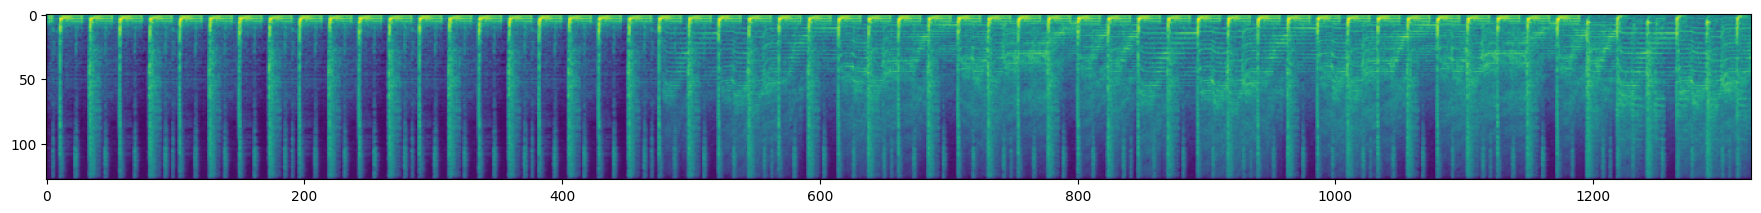

In [69]:
index = 112
plt.figure(figsize=(22,10))
specto_from_index(index)
url_from_index(index, filenames)

In [66]:
cluster_url(4, clusters, filenames)

['https://www.deezer.com/de/track/1116467572']